<a href="https://colab.research.google.com/github/krishchat/Auto-Price-Predictor/blob/main/Auto_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description - Auto Price Predictor App

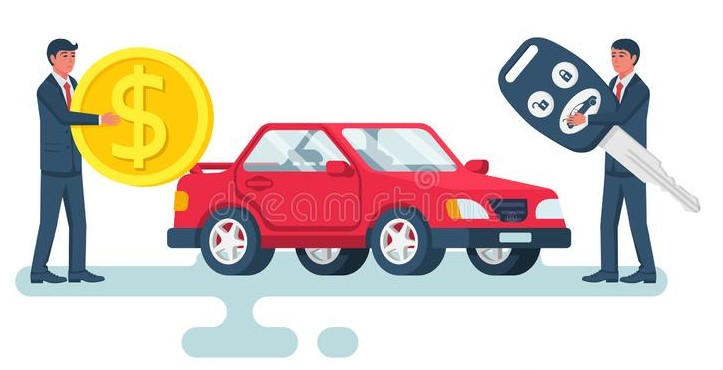

#### Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

#### Business Requirement

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

#### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

##### Data Dictionary

S.No.:Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase (cities)

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)

Price: The price of the used car in INR Lakhs


## 1. Loading Libraries:

#### Importing all necessary libraries

In [ ]:
# For reading and manipulating data
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#To display the plot here
%matplotlib inline

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# to show all columns in the dataset
pd.set_option('display.max_columns', None)


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Loading and exploring the data

   a) Loading csv data into a pandas dataframe.
   
   b) Creating and saving a copy (deep copy) of the dataframe.
   
   c) Checking Datatype of columns.
   
   d) Look for Columns with Missing Data.
   
   e) Check duplicate records.

#### Loading csv data into dataframe and saving the original data in a separate dataframe

In [ ]:
df = pd.read_csv('used_cars_data.csv')
df_orig = df.copy() # A Deep Copy is secure to save the data

#### Viewing a random sample set of record from dataframe

In [ ]:
np.random.seed(1) 

df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00,8.23,6.34


#### Checking Datatypes & Missing Values

In [ ]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset');
df.info();

There are 7253 rows and 14 columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


#### Creating below Function to Print Columns with Missing data

In [ ]:
def print_miss_val_cols():
    
    ''' Function to loop through all columns with missing values and print them'''
    
    # Converting all Missing Value Columns into a Dictionary:
    miss_cols = df.isnull().sum().to_dict()
    
    for key, value in miss_cols.items():
        if value > 0:
            print(f'Total missing value in {key} = {value}')

In [ ]:
# Checking Missing Values in the dataframe
print_miss_val_cols()

Total missing value in Mileage = 2
Total missing value in Engine = 46
Total missing value in Power = 175
Total missing value in Seats = 53
Total missing value in Price = 1234


In [ ]:
# Checking for Duplicates in the dataframe

df.duplicated().sum()

0

1. There are 7253 rows and 14 columns in the dataset.
2. Missing Values:
    a. Mileage = 2
    b. Engine = 46
    c. Power = 175
    d. Seats = 53
    e. Price = 1234
3. Therea are no duplicate record.    
4. Mileage,Engine and Power can be converted to Numeric Colums by removing their Units.

## 3. Data Processing & Feature Engineering

#### Droping Columns and Rows:

   a) Removing S.No Column as it's not adding any value.
    
   b) Droping records where dependent variable Price was missing.


#### Splitting Name Column:

   a) Name column is splitted into Make and Model/submodel for better evaluation.
   

#### Removing Unit of Measure:

   a) Removing Units from Mileage column.
    
   b) Removing Units from Engine column.
    
   c) Removing Units from Power column.


#### Changing Column Datatypes:

   a) Converting Mileage Column from text to Float.
   
   b) Converting Engine Column from text to Float.
    
   c) Converting Power Column from text to Float.
    
   d) Converting Fuel_Type to Categorical.
    
   e) Converting Transmission to Categorical.
    
   f) Converting Owner_Type to Categorical.
    
   g) Converting Seats to Categorical.
   
   h) Converted Make(New column from Name) to Categorical.
   
   i) Converted Model(New column from Name) to Categorical.
   
   
#### Imputing Missing Values in all Features:

   a) Missing Values in Mileage is taken care.
    
   b) Missing Values in Engine is taken care.
    
   c) Missing Values in Power is taken care.
   
   d) Missing Values in Seats is taken care.    
    
  

In [ ]:
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74


#### Mileage, Engine and Power should be numerical columns but as they have units they turned Strings.
#### Hence, creating a Function "strip_units" to remove the Unit values from data.

In [ ]:
def strip_units(val, unit):
    ''' This Function takes the Values and removed the Unit of Measure from end and return '''
    return val.rstrip(unit) if isinstance(val, str) and (val.endswith(unit)) else val



# As Mileage column has 2 different Unit of Measures, kmpl and km/kg, we're looping through the dataframe
# and removing the Unit one at a time.

for units in ['kmpl','km/kg']:
    df['Mileage'] = df['Mileage'].apply(strip_units, unit=units)


df['Engine'] = df['Engine'].apply(strip_units, unit='CC')
df['Power'] = df['Power'].apply(strip_units, unit='bhp')

#### Converting Mileage, Engine and Power to float

In [ ]:
df['Mileage'] = df['Mileage'].astype('float64') 
df['Engine'] = df['Engine'].astype('float64') 
df['Power'] = df['Power'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


#### Checking those records for which Actual Price is Missing.

In [ ]:
df[df['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.00,58.20,4.00,4.36,NaN
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.00,47.30,5.00,4.36,NaN
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.00,147.80,7.00,25.27,NaN
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.00,NaN,5.00,8.53,NaN
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.00,82.85,5.00,10.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.00,103.60,5.00,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.00,103.60,5.00,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.00,63.10,5.00,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.00,103.60,5.00,10.15,NaN


#### As 1234 rows do not have Actual Price (dependent column), hence these records make no sense to teach our models.So, we've to drop these records from dataframe

In [ ]:
# Droping Records for which Price is NaN.

df.dropna(subset=['Price'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 705.4+ KB


#### Lets Drop S.No. Column which doesn't seem to add any value

In [ ]:
df.drop(['S.No.'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


#### Triming Name of Car for WhiteSpaces and turning it to Uppercase. It will help to match characters later

In [ ]:
df['Name'] = df['Name'].str.upper()
df['Name'] = df['Name'].str.strip()

#### Lets checkout 2 missing values of Mileage Column.

In [ ]:
# Show records where Mileage is NaN
df.loc[df['Mileage'].isnull(), :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,MAHINDRA E VERITO D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.00,41.00,5.00,13.58,13.00
4904,TOYOTA PRIUS 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.00,73.00,5.00,24.01,12.75


In order to fill the missing values in Mileage Column, lets try and find out another car with similar attributes and see what's the value present for it

In [ ]:
# Show records where Name contains "Verito"
df[df['Name'].str.contains("VERITO", case=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
223,MAHINDRA VERITO 1.5 D4 BSIV,Hyderabad,2013,107000,Diesel,Manual,First,21.03,1461.00,65.00,5.00,9.12,3.70
1547,MAHINDRA VERITO 1.5 D4 BSIV,Pune,2015,90000,Diesel,Manual,Second,21.03,1461.00,65.00,5.00,9.26,3.10
1753,MAHINDRA VERITO 1.5 D6 BSIV,Chennai,2011,110000,Diesel,Manual,Second,21.00,1461.00,64.10,5.00,9.12,2.40
4446,MAHINDRA E VERITO D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.00,41.00,5.00,13.58,13.00
5735,MAHINDRA VERITO 1.5 D6 BSIV,Kochi,2012,118683,Diesel,Manual,Second,21.00,1461.00,64.10,5.00,9.12,3.19


In [ ]:
# Show records where Name contains "Prius"
df[df['Name'].str.contains("PRIUS", case=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4904,TOYOTA PRIUS 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.00,73.00,5.00,24.01,12.75


#### Unfortunately, there are no other records for Mahindra Electric Verito and Toyotal Prius from which we could find the Mileage of these cars and impute missing values. Hence we have to research about their Mileage over Internet and impute these records

In [ ]:
# Finding all Electric Cars from the dataframe to see how "Mileage" is calculated
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,MAHINDRA E VERITO D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.00,41.00,5.00,13.58,13.00
4904,TOYOTA PRIUS 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.00,73.00,5.00,24.01,12.75


#### We can either Drop these 2 records or just impute the Mileage with Median values.

In [ ]:
# Finding Median of Mileage
df['Mileage'].describe().T

print(df['Mileage'].median())

18.15


#### Median of Mileage = 18.15. Hence filling missing values with 18.15

In [ ]:
# now using `fillna` with a numeric column
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)  # median imputation

df['Mileage'].isnull().sum()

0

#### Lets analyze Engine, Power and Seats columns to find number of Missing Values

In [ ]:
print_miss_val_cols()

Total missing value in Engine = 36
Total missing value in Power = 143
Total missing value in Seats = 42


#### Creating a Function to find the Mean Engine, Mean Power and Mean Seats value for a certain Car

In [ ]:
def get_engine_power_seats(car, attr):
    
    ''' This function takes computes the mean value of Engine, Power and Seats for any particular Car
        Input - Car = Make and model of Car
                Attr = Engine / Power / Seats
        
        Output - Return the Mean of the Attr
    '''
    if attr == 'Engine':
        engine = df[df['Name'] == car]['Engine'].mean()
        return engine
    elif attr == 'Power':
        power = df[df['Name'] == car]['Power'].mean()
        return power
    elif attr == 'Seats':
        seats = df[df['Name'] == car]['Seats'].mean()
        return seats
    else:
        return -1

#### Imputing Missing values in Engine, Power and Seats columns by computing from above Function

In [ ]:
for val in ['Engine', 'Power', 'Seats']:
    df[val].fillna(df['Name'].apply(get_engine_power_seats, attr=val), inplace = True)

In [ ]:
print_miss_val_cols()

Total missing value in Engine = 31
Total missing value in Power = 113
Total missing value in Seats = 36


#### Remainig 31 missing records in Engine is filled by the median

In [ ]:
# 31 Records still have missing values for Engine. Hence filling them with Median Values of Engine

df['Engine'].fillna(df['Engine'].median(), inplace = True)

In [ ]:
print_miss_val_cols()

Total missing value in Power = 113
Total missing value in Seats = 36


#### As we know, engine of a car and power are highly correlated, hence lets checkout if we can conclude same observation from the dataset

Correlation between Engine & Power is 0.87


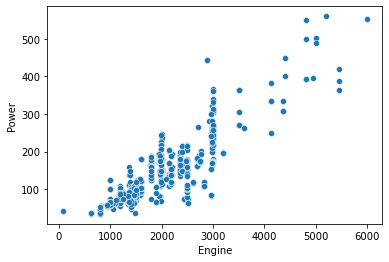

In [ ]:
# Plotting Engine vs Power Correlation
sns.scatterplot(data=df, x='Engine', y='Power')

eng_pwr_corr = df['Engine'].corr(df['Power'])

print(f'Correlation between Engine & Power is {round(eng_pwr_corr,2)}')

#### Since there is very high correlation between Engine and Power, hence we will find the Power of Cars that has similar Engines. Then  grab the corressponding Power value from those cars and imput it in the missing place.

In [ ]:
# Creating a list of all distinct engines where value of Power is Missing. Next finding the median value 
# of power where each of these Engines have values in the dataset

engine_list = list(df[df['Power'].isnull()]['Engine'].unique())

# Creating below dictionary to store Engine vs Median_Power as key-value pairs
engPow = {}

#Iterating over the Engine List, finding corressponding median Power and inserting into the dictionary
for engines in engine_list:
    median_power = df[df['Engine']== engines]['Power'].median()
    
    '''When we could not calculate median Power based on Engine value, we're considering a 
       range (+/- 500) engine value. Then taking a Mean value and imputing it in Power'''
    
    if np.isnan(median_power): #If calculated median_power is NaN)
        low_buffer = engines - 500
        high_buffer = engines + 500
        buff_med_power = df[(df['Engine']>low_buffer) & (df['Engine']<high_buffer)]['Power'].mean()
        engPow[engines] = round(buff_med_power,2)
    else:
        engPow[engines] = median_power     

# A function that returns val (Median Power) when queried by the Key (Engine)
def get_power_from_engine(engVal):
    return engPow.get(engVal)

In [ ]:
print_miss_val_cols()

Total missing value in Power = 113
Total missing value in Seats = 36


#### Calling above function to fill missing values for Power column

In [ ]:
df['Power'].fillna(df['Engine'].apply(get_power_from_engine), inplace = True)

In [ ]:
print_miss_val_cols()

Total missing value in Seats = 36


#### Now lets treat Missing values in Seats Column

In [ ]:
# List of Cars for which seat is Missing

print('Have to find number of Seats for following Cars', '\n')

for cars in list(df[df['Seats'].isnull()]['Name'].unique()):
    print(cars)

Have to find number of Seats for following Cars 

MARUTI SWIFT 1.3 VXI
FORD FIGO DIESEL
LAND ROVER RANGE ROVER 3.0 D
HONDA CITY 1.3 DX
MARUTI SWIFT 1.3 ZXI
LAND ROVER RANGE ROVER SPORT 2005 2012 SPORT
MARUTI SWIFT 1.3 LXI
HYUNDAI SANTRO LP ZIPPLUS
MARUTI SWIFT 1.3 VXI ABS
MARUTI ESTILO LXI
BMW 5 SERIES 520D SEDAN
HYUNDAI SANTRO GLS II - EURO II
MARUTI WAGON R VX
FORD ENDEAVOUR HURRICANE LE
HONDA CR-V AT WITH SUN ROOF
FIAT PUNTO 1.3 EMOTION
HYUNDAI SANTRO XING XG
FIAT PUNTO 1.2 DYNAMIC
FIAT PUNTO 1.4 EMOTION


#### Checking Statistical dimensions of Seats column

In [ ]:
df['Seats'].describe()

count   5983.00
mean       5.28
std        0.81
min        0.00
25%        5.00
50%        5.00
75%        5.00
max       10.00
Name: Seats, dtype: float64

In [ ]:
print_miss_val_cols()

Total missing value in Seats = 36


#### Q1, Q2 and Q3 for no. of Seats is 5, and all the cars for which Seat is missing in the dataset is also 5 (verified from Internet). Hence updating all the missing Seat values by 5

In [ ]:
df['Seats'].fillna(5,inplace=True)

df['Seats'] = df['Seats'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   int32  
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(5)
memory usage: 634.8+ KB


#### Wonderful, now we've successfully processed all missing values

#### Lets find out the number of distinct values in certain columns like Fuel_Type, Transmission, Owner_Type and Seats features. Looks like we can convert them to Categorical Columns

In [ ]:
# Looping through all columns and printing where we have less than 10 unique values
for cols in df.columns:
    if df[cols].nunique() < 10:
        print(f'{cols} has {df[cols].nunique()} unique values {df[cols].unique()}')

Fuel_Type has 5 unique values ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission has 2 unique values ['Manual' 'Automatic']
Owner_Type has 4 unique values ['First' 'Second' 'Fourth & Above' 'Third']
Seats has 9 unique values [ 5  7  8  4  6  2 10  9  0]


#### Converting following Columns to Categorical -
1. Fuel_Type.
2. Transmission.
3. Owner_Type.
4. Seats

In [ ]:
for cols in df.columns:
    if df[cols].nunique() < 10:
        df[cols] = df[cols].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   object  
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   category
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(2)
memory usage: 494.6+ KB


#### Lets work on the Name column to separate Make and Model into 2 different columns

In [ ]:
# Splitting Name column into 2 parts, Make and Model

make = df['Name'].apply(lambda x : x.split()[0])
model = df['Name'].apply(lambda x : x.split()[1])

#### Adding 2 New columns Make and Model to the dataframe and Droping the Name column

In [ ]:
# Inserting the Columns into beginning of dataframe
df.insert(0,'Make', make)
df.insert(1,'Model', model)


#Dropping old Name column as no longer needed
df.drop(['Name'], axis=1, inplace=True)

del make,model # clearing the temp variable

#### Coverting Make and Model to Categorical columns

In [ ]:
df['Make'] = df['Make'].astype('category')
df['Model'] = df['Model'].astype('category')

#### Processing Make & Model Column more -as this is highly Textual Columns

In [ ]:
# Changing Make to LANDROVER where it became LAND

df.Make.replace('LAND', 'LANDROVER', inplace=True)

In [ ]:
# Find the Average Price of Car Makers 

#Binning the Car Companies based on avg prices of each Company.

temp = df.copy()
table = temp.groupby(['Make'])['Price'].mean().reset_index()
temp = temp.merge(table, how='left',on='Make')
bins = [0,10,20,30,40]
cars_bin=['Budget','Medium','Highend','Premium']
df['Price_Range'] = pd.cut(temp['Price_y'],bins,right=False,labels=cars_bin)

df['Price_Range'].astype('category')

df.head()

,Make,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Price_Range
0,MARUTI,WAGON,Mumbai,2010,72000,CNG,Manual,First,26.60,998.00,58.16,5,5.51,1.75,Budget
1,HYUNDAI,CRETA,Pune,2015,41000,Diesel,Manual,First,19.67,1582.00,126.20,5,16.06,12.50,Budget
2,HONDA,JAZZ,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.00,88.70,5,8.61,4.50,Budget
3,MARUTI,ERTIGA,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.00,88.76,7,11.27,6.00,Budget
4,AUDI,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.00,140.80,5,53.14,17.74,Highend


In [ ]:
np.random.seed(1)
df.sample(5)

,Make,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Price_Range
2319,MERCEDES-BENZ,E-CLASS,Coimbatore,2019,9312,Diesel,Automatic,First,18.00,2987.00,258.00,5,92.50,78.80,Highend
3652,MARUTI,SX4,Coimbatore,2008,77325,Petrol,Manual,First,15.60,1586.00,104.68,5,7.88,3.51,Budget
2397,FORD,ECOSPORT,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497.00,121.36,5,9.47,6.00,Budget
3536,HONDA,CITY,Kochi,2018,11966,Petrol,Manual,First,16.80,1497.00,116.30,5,13.58,10.28,Budget
4400,VOLKSWAGEN,POLO,Kolkata,2011,46000,Petrol,Manual,First,15.26,1598.00,103.50,5,10.15,2.35,Budget


## 4. Exploratory Data Analysis

#### Viewing Statistical summary of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.00,2013.36,3.27,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.00,58738.38,91268.84,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.00,18.13,4.58,0.00,15.17,18.15,21.10,33.54
Engine,6019.00,1620.41,599.68,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.00,112.64,53.60,34.20,74.00,94.00,138.10,560.00
New_Price,6019.00,21.50,24.33,3.91,7.88,11.30,21.77,375.00
Price,6019.00,9.48,11.19,0.44,3.50,5.64,9.95,160.00


#### Lets check out the distribution of each of these variables

In [ ]:
# Creating below function to create Histogram and BoxPlot

def myplot(df_sample, xaxis):
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data = df_sample,x=xaxis, kde= True, ax= axes[0]).set(title= xaxis + ' Distribution');
    sns.boxplot(data = df_sample,x=xaxis,ax= axes[1]).set(title=xaxis + '  Outliers');
    

# Plotting with Log    
def myplot_log(df_sample, xaxis):
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data = df_sample,x=np.log(df_sample[xaxis]), kde= True, ax= axes[0]).set(title= xaxis + ' Distribution');
    sns.boxplot(data = df_sample,x=np.log(df_sample[xaxis]),ax= axes[1]).set(title=xaxis + '  Outliers');    

### a. Plotting Price Distribution:

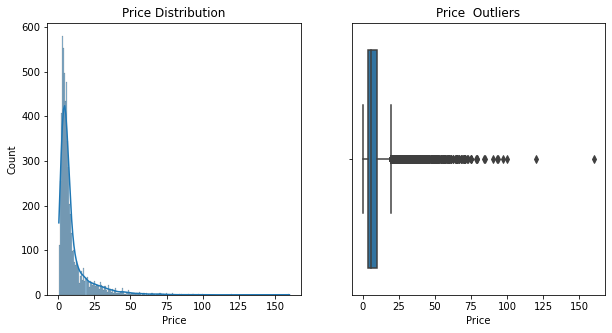

In [ ]:
myplot(df,'Price');

1. Very Right Skewed distribution.
2. This is our Dependent Variable.
3. Lets Log Transform this to normalize the data.

### Log Transformation of Price (Dependent Variable)

As min of Price is greater than `0` so we can directly perform Log transformation

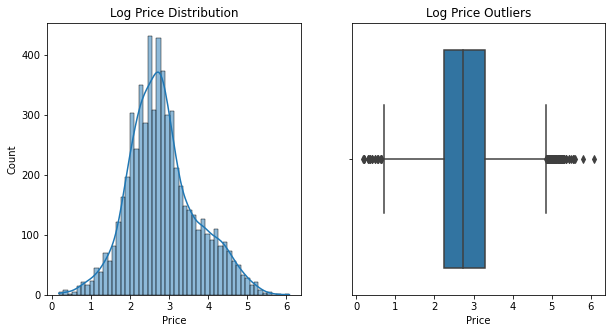

In [ ]:
#  Plotting on log of Price

# Adding 1 to log('Price') as few datapoints are getting Negative after Log Transformation of Price.

# Plotting Distribution of log(Price) +1 

fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data = df,x=np.log(df['Price'])+1, kde= True, ax= axes[0]).set(title= 'Log Price Distribution');
sns.boxplot(data = df,x=(np.log(df['Price'])+1),ax= axes[1]).set(title='Log Price Outliers');    

Amazing, Log transformation of New_Price decreased the scale of distribution and made it almost a Normal Distribution. Hence updating Column `Price` with its log log transfered value and adding 1 to avoid 0 or negative values.

In [ ]:
# Updating Price Column by its Log transformed Value +1 (To avoid less than `0` value).

df['Price'] = np.log(df['Price'])+1


In [ ]:
df[df['Price'] < 0]

,Make,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Price_Range


### b. Plotting New Price Distribution:

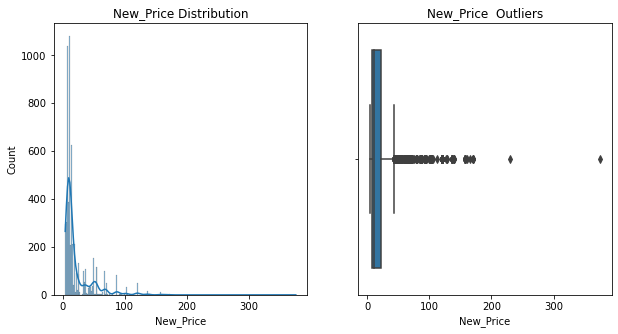

In [ ]:
myplot(df,'New_Price');

1. Very Right Skewed distribution.
2. We can perform Log Transformation.

#### Log Transformation of New_Price

As min of New_Price is greater than `0` so we can directly perform Log transformation

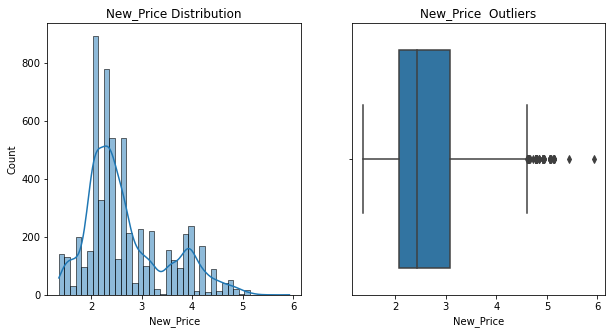

In [ ]:
# Plotting on log of New_Price

myplot_log(df,'New_Price');

Amazing, Log transformation of New_Price decreased the scale of distribution and made it almost a Normal Distribution. Hence creating a New Column New_Price_Log and dropping original New_Price column.

In [ ]:
# Creating a New Column New_Price_Log and dropping original Price column.

df['New_Price_Log'] = np.log(df['New_Price'])
df.drop(['New_Price'], axis = 1, inplace = True)

### c. Plotting Mileage Distribution:

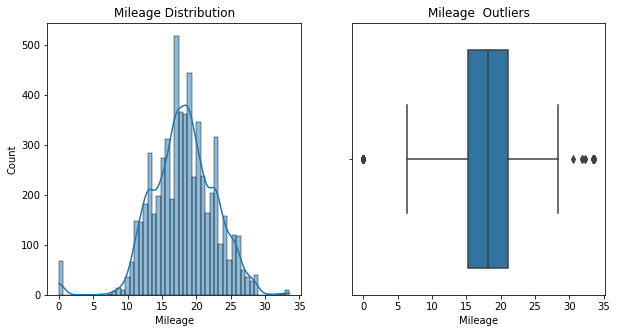

In [ ]:
myplot(df,'Mileage');

1. Mileage is almost Normally distributed data.
2. There are some outliers on both sides which needs to be treated.

### d. Plotting Power Distribution:

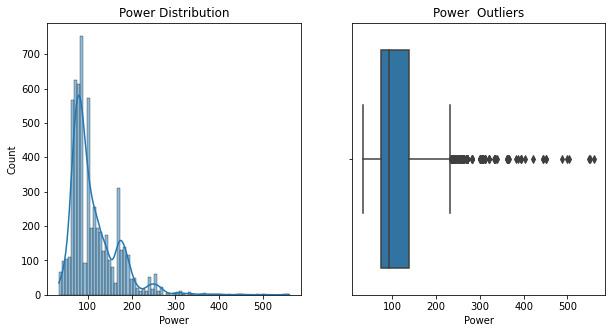

In [ ]:
myplot(df, 'Power')

1. Power shows a right skewed distribution.
2. There are lot of outliers which needs to be treated later on.

### e. Plotting Engine Distribution:

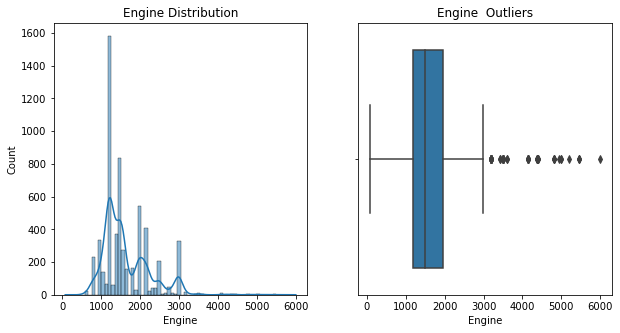

In [ ]:
myplot(df, 'Engine')

1. Engine shows a right skewed distribution.
2. There are lot of outliers which needs to be treated later on.

### f. Plotting Kilometers_Driven Distribution:

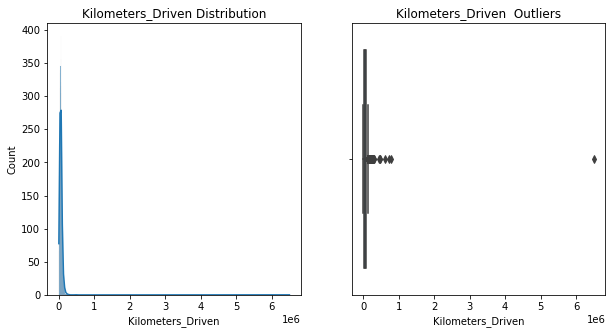

In [ ]:
myplot(df, 'Kilometers_Driven');

1. Very Right Skewed distribution.
2. We can perform Log Transformation.

#### Log Transformation of Kilometers_Driven

As min of Kilometers_Driven is greater than `0` so we can directly perform Log transformation

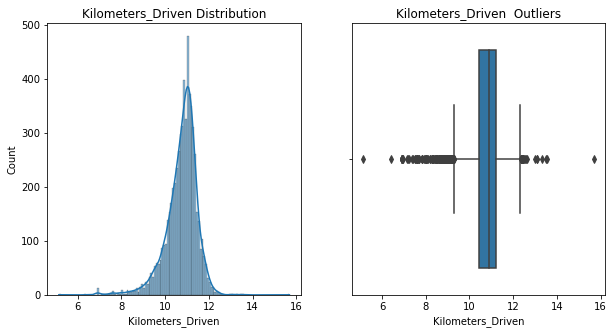

In [ ]:
# Plotting log of Kilometers_Driven

myplot_log(df,'Kilometers_Driven');

Magic!! Log transformation of Kilometers_Driven decreased the scale of distribution and made it almost a Normal Distribution. Hence creating a New Column Kilometers_Driven_Log and dropping original Kilometers_Driven column.

In [ ]:
# Creating a New Column Kilometers_Driven_Log and dropping original Kilometers_Driven column.

df['KM_Driven_Log'] = np.log(df['Kilometers_Driven'])

df.drop(['Kilometers_Driven'],axis=1,inplace=True)


### g. Plotting Mfg Year Distribution:

count   6019.00
mean    2013.36
std        3.27
min     1998.00
25%     2011.00
50%     2014.00
75%     2016.00
max     2019.00
Name: Year, dtype: float64


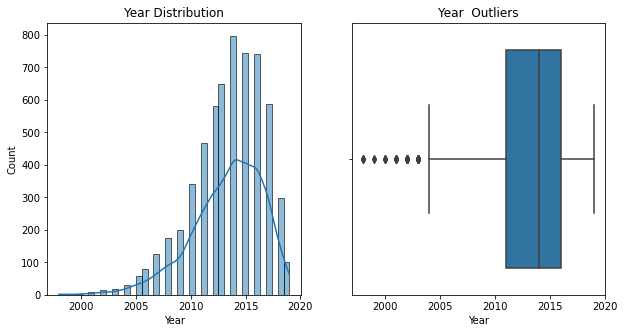

In [ ]:
myplot(df, 'Year');

print(df['Year'].describe())

1.Manufacturing Year shows a Left Skewed distribution.

2.50% of the Cars are manufactured in last 5 years.

3.Outliers detected which needs to be taken care.


In [ ]:
df.head(10)

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
0,MARUTI,WAGON,Mumbai,2010,CNG,Manual,First,26.60,998.00,58.16,5,1.56,Budget,1.71,11.18
1,HYUNDAI,CRETA,Pune,2015,Diesel,Manual,First,19.67,1582.00,126.20,5,3.53,Budget,2.78,10.62
2,HONDA,JAZZ,Chennai,2011,Petrol,Manual,First,18.20,1199.00,88.70,5,2.50,Budget,2.15,10.74
3,MARUTI,ERTIGA,Chennai,2012,Diesel,Manual,First,20.77,1248.00,88.76,7,2.79,Budget,2.42,11.37
4,AUDI,A4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.00,140.80,5,3.88,Highend,3.97,10.61
5,HYUNDAI,EON,Hyderabad,2012,LPG,Manual,First,21.10,814.00,55.20,5,1.85,Budget,2.33,11.23
6,NISSAN,MICRA,Jaipur,2013,Diesel,Manual,First,23.08,1461.00,63.10,5,2.25,Budget,2.25,11.37
7,TOYOTA,INNOVA,Mumbai,2016,Diesel,Automatic,First,11.36,2755.00,171.50,8,3.86,Medium,3.04,10.49
8,VOLKSWAGEN,VENTO,Pune,2013,Diesel,Manual,First,20.54,1598.00,103.60,5,2.65,Budget,2.58,11.07
9,TATA,INDICA,Chennai,2012,Diesel,Manual,Second,22.30,1248.00,74.00,5,1.67,Budget,2.03,11.10


### h. Check out distribution of sales of Car Make

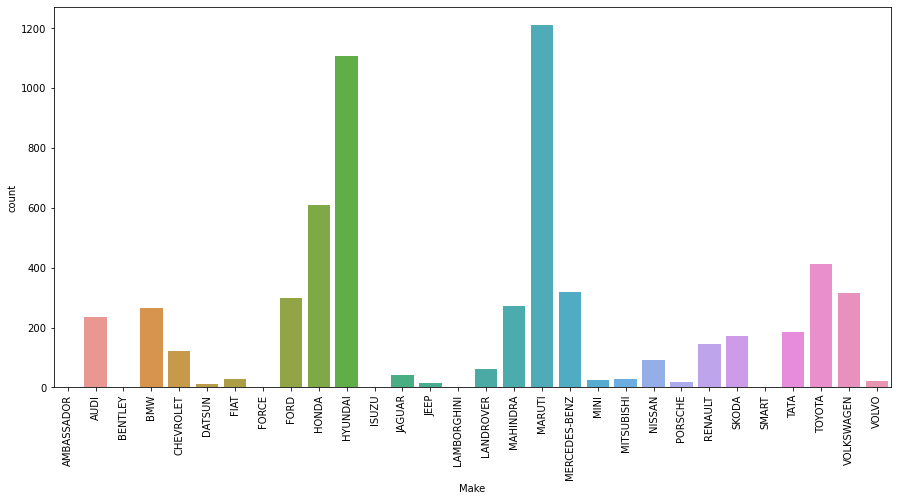

In [ ]:
plt.figure(figsize = (15, 7));
sns.countplot(data=df, x='Make');
plt.xticks(rotation=90);

### i. Car Model Sales

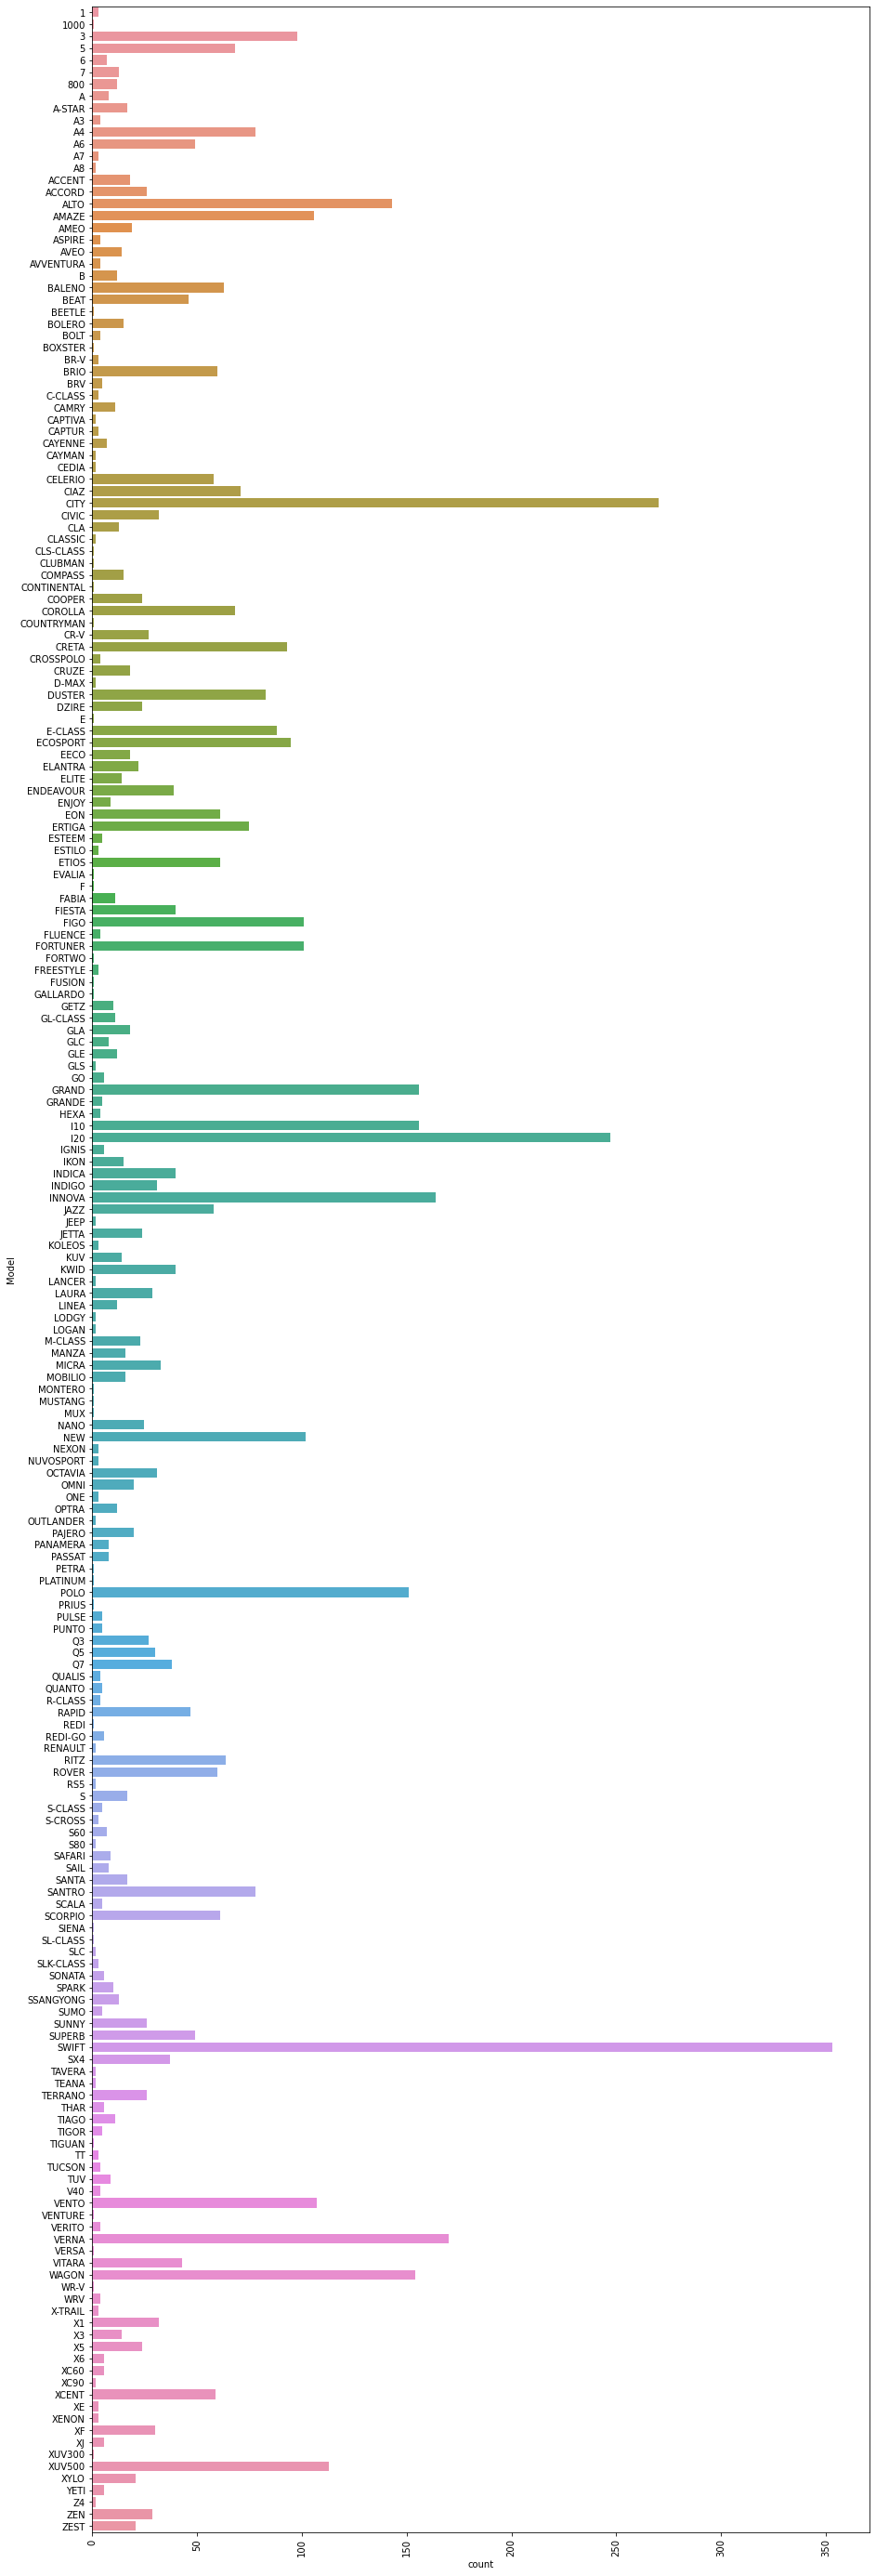

In [ ]:
plt.figure(figsize = (15, 50));
sns.countplot(data=df, y='Model');
plt.xticks(rotation=90);

1. Maruti is the most sold Car from beginning.
2. And Swift is the highest sold model.

So, Maruti Swift is the winner in number of cars Sold.

### Sales Vs Car Price Range

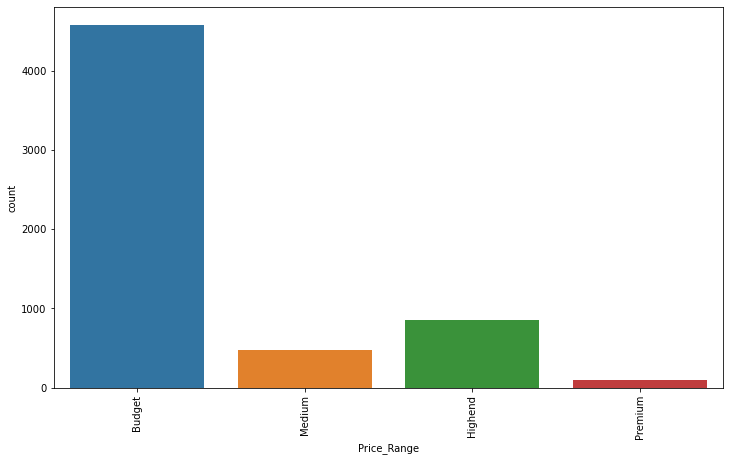

In [ ]:
plt.figure(figsize = (12, 7));
sns.countplot(data=df, x='Price_Range');
plt.xticks(rotation=90);

### k. Sales vs ~ Fuel Type, Transmission, Location, Seats and Owner Types

In [ ]:
#A Function to add percentage % to the Count plots
def perc_cal(plot, feature):
   total = len(feature) # column length
   for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # class %
        x = p.get_x() + p.get_width() / 2 - 0.05 # width
        y = p.get_y() + p.get_height()           # hieght
        plot.annotate(percentage, (x, y), size = 15) # annotate %

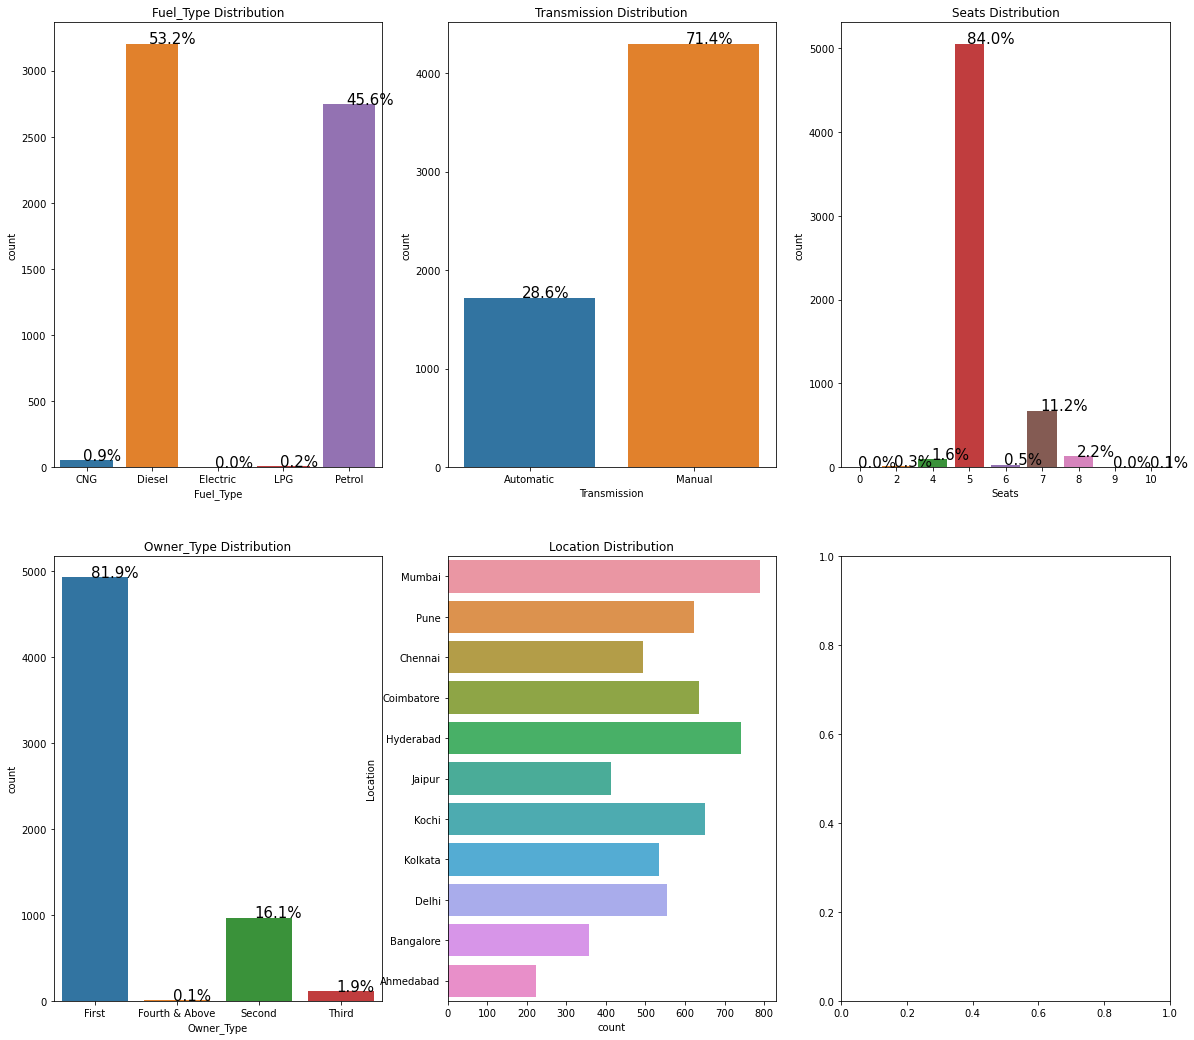

In [ ]:
# Loop thru the Categorical columns and Plotting them together

fig, axes = plt.subplots(2, 3, figsize = (20,18))

cat_f = ['Fuel_Type','Transmission','Seats','Owner_Type', 'Location']

for i in range(len(cat_f)):
    row = i//3
    col = i%3
    plt_ax = axes[row, col]
    
    if cat_f[i] == 'Location':
        sns.countplot(data=df, y=cat_f[i], ax= plt_ax).set(title= cat_f[i] + ' Distribution')
    else:
        sns.countplot(data=df, x=cat_f[i], ax= plt_ax).set(title= cat_f[i] + ' Distribution')
        perc_cal(plt_ax,df[cat_f[i]])
        
    

plt.show()

1. Diesel(53%) & Petrol(45%) Cars are most sold with Diesel being a little ahead.
2. Budget Cars (below 10 Lakh) have way high Sales
3. Almost 72% customers went for Manual Transmission Cars.
4. 84% sales is 5 Seater cars.
5. Almost 82% of customers buy new cars.
6. Mumbai and Hyderabad are cities with highest sale. 

### Bivariate Analysis

#### a. Lets start with a HeatMap to find Correlations

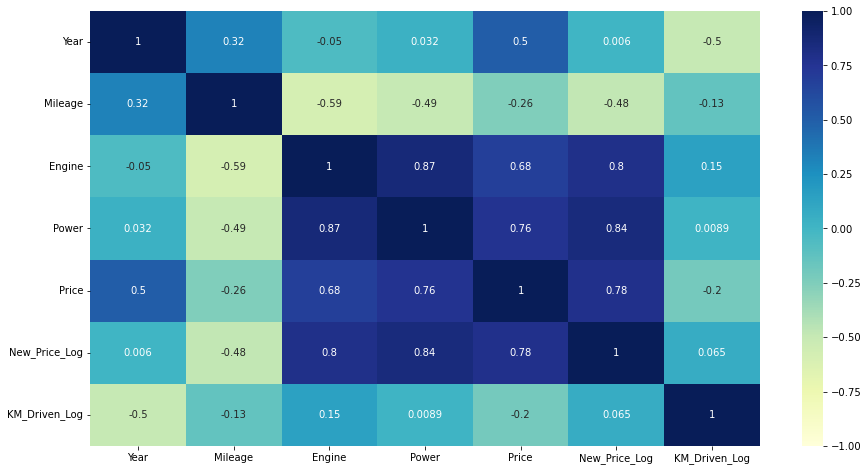

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(
data = df.corr(),
annot = True,
cmap = 'YlGnBu',
vmin = -1, 
vmax=1
)
plt.show()

From HeatMap, we can conclude - 

##### High Correlation between:

1. Engine vs Power = 0.87
    
2. New Price vs Power = 0.84
    
3. New Price vs Engine = 0.80

##### Moderate Correlation between:

1. New Price vs Price = 0.74
    
2. Price vs Power = 0.77
    
3. Price vs Power = 0.66


##### Some Negative Correlation between:

1. Engine vs Mileage.


#### Lets check Price vs Mileage

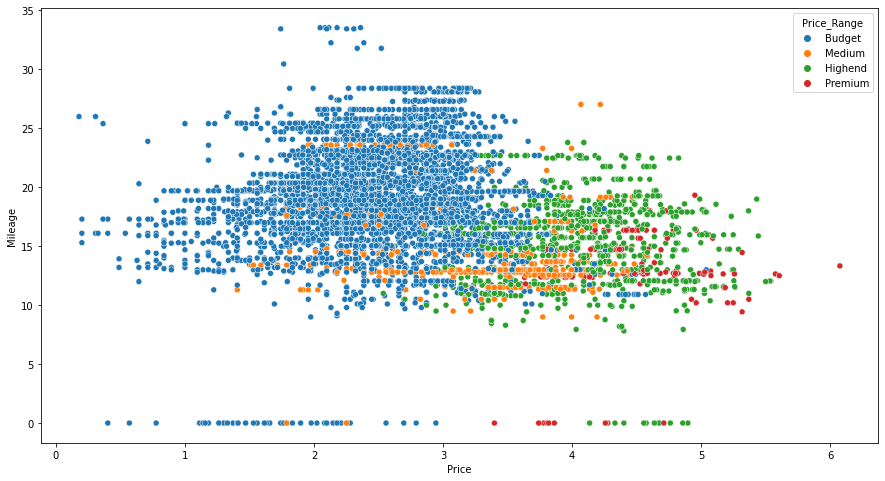

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=df, x='Price', y='Mileage', hue ='Price_Range');
plt.show();

1. Budget Cars mostly gives high mileage.
2. Premium cars gives mostly low mileages.

#### b. Car Sales Based on Location

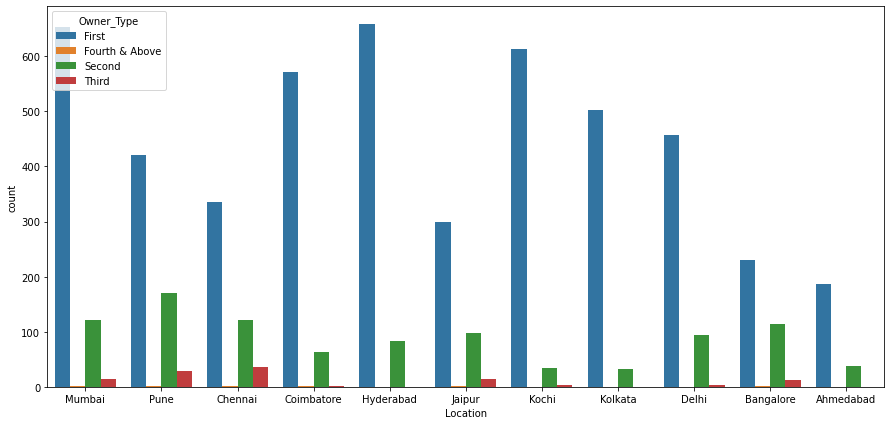

In [ ]:
plt.figure(figsize = (15,7));
sns.countplot(data=df, x='Location', hue = 'Owner_Type');
plt.show();

1. Hyderabad and Mumbai are leaders in New Car sale.
2. Pune leads in Second Hand Car Market

#### c. Car Price over Time for all Makes

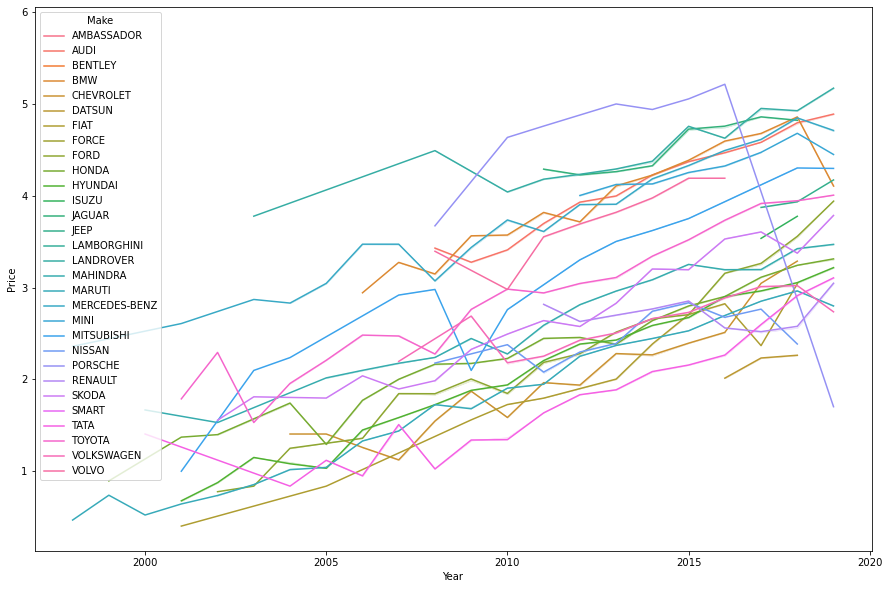

In [ ]:
plt.figure(figsize = (15,10));
sns.lineplot(data=df, x='Year', y='Price', hue= 'Make', ci= False);

plt.show();

1. For every car, the price has increased over time except Porsche

#### d. Car Transmission and Location

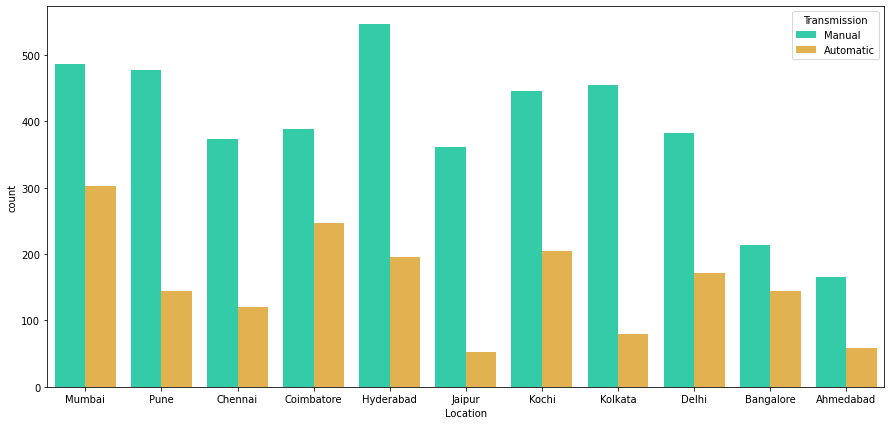

In [ ]:
plt.figure(figsize = (15,7));
sns.countplot(data=df, x='Location', hue = 'Transmission', 
              hue_order = ['Manual','Automatic'],
             palette = 'turbo');
plt.show();

1. Automatic Cars shows high demand in Mumbai and least in Jaipur.
2. Manual Cars highest sale in Hyderabad followed by Mumbai.

#### e. Fuel Type and Location

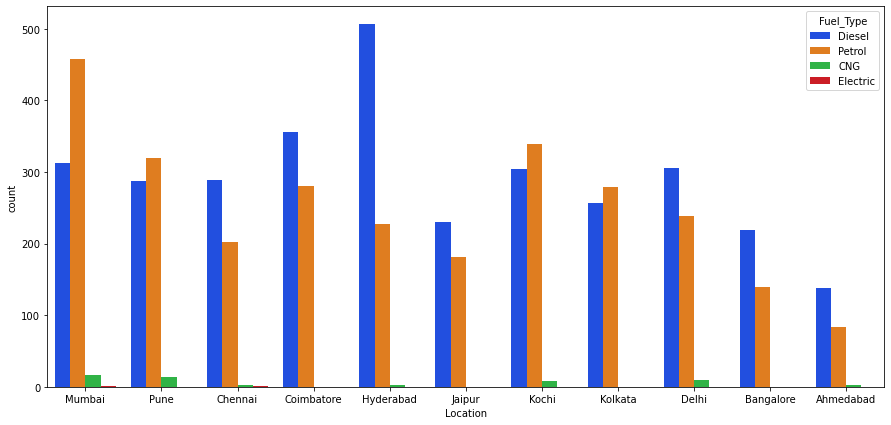

In [ ]:
plt.figure(figsize = (15,7));
sns.countplot(data=df, x='Location', hue = 'Fuel_Type', 
              hue_order = ['Diesel','Petrol','CNG', 'Electric'],
              palette='bright');
plt.show();

#### Car Price Range vs Engine and Power

1. Diesel cars are high on demand in Hyderabad.
2. Mumbai have a high sale of Petrol cars.
3. Some cities have little CNG sales while some dont use CNG.
4. Electric Cars are extremely rare throughout the country.

#### f. New Car Price vs Old Car Price

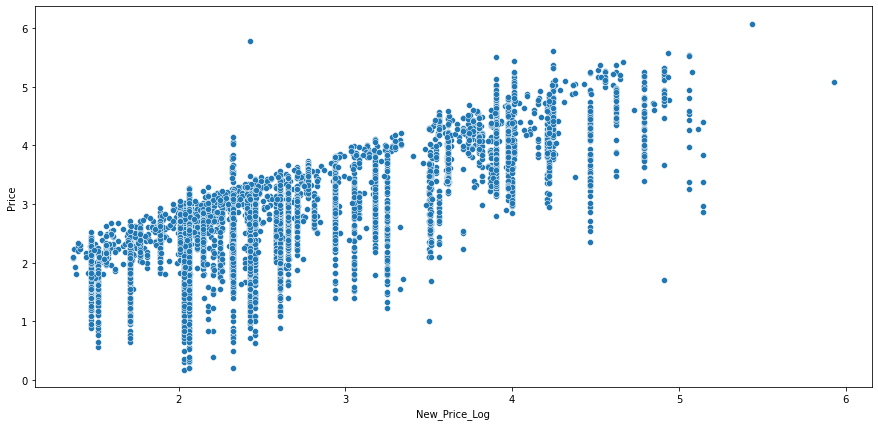

In [ ]:
plt.figure(figsize = (15,7));
sns.scatterplot(data=df,x='New_Price_Log', y='Price');
plt.show();

#### g. Mileage vs Engine Size

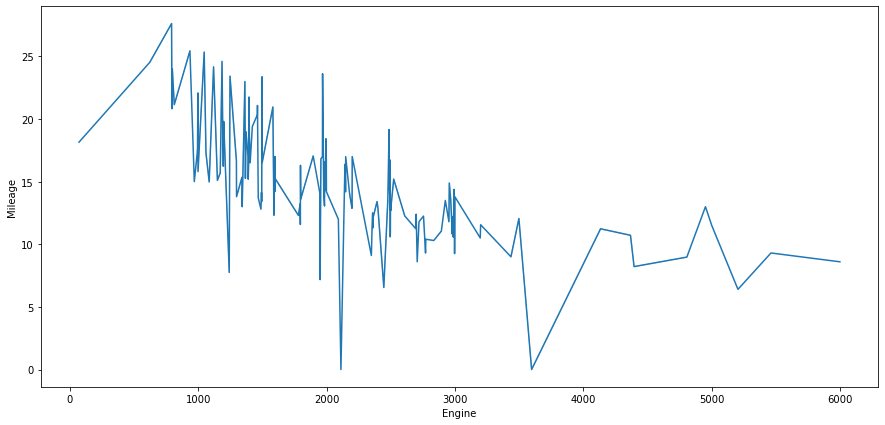

In [ ]:
plt.figure(figsize = (15,7));
sns.lineplot(data=df,y='Mileage', x='Engine', ci=False);
plt.show();

#### h. Power vs Engine Size

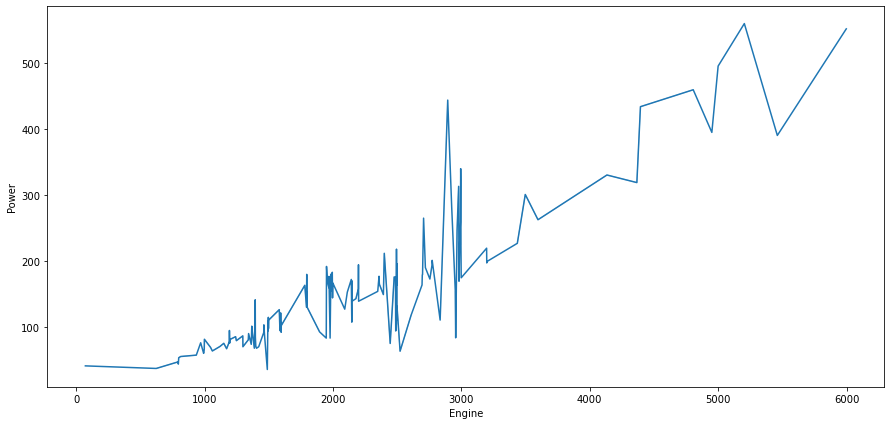

In [ ]:
plt.figure(figsize = (15,7));
sns.lineplot(data=df,x='Engine', y='Power', ci=False);
plt.show();

1. So, price of Used car has a positive correlation with that of a New Car.
2. As Engine Size increases, Mileage decreases.
3. More power comes with a bigger Engine.
4. Budget Cars mostly gives high mileage.
2. Premium cars gives mostly low mileages.

## Outliers Handling

#### From Univariate analysis, we found following features has Outliers even after Log transformation. We will check them one by one. The challenge with outlier detection is determining if a point is truly a problem or simply a large value.

1. Price
2. New_Price_Log
3. Enigne
4. Power

#### Z-Score : It is a measure of "how many Standard Deviations" away a datapoint is from mean.

In [ ]:
# A function that will show Outliers based on Z_Score

from scipy import stats

def showoutlier_zscore(data_set):
    z_score = np.abs(stats.zscore(data_set))
    z_score = np.where(z_score > 3)
    return df.filter(items = z_score[0], axis = 0)



#### IQR Score : Return records which are Less than Q1 - 1.5*IQR OR Greater than Q3 + 1.5*IQR

In [ ]:
# A function that will show Outliers based on IQR - datapoints which is Smaller than 
#(Q1 - 1.5IQR) or Greater than (Q3 + 1.5IQR)

def showoutlier_iqr(data_set):
    Q1 = data_set.quantile(0.25)
    Q3 = data_set.quantile(0.75)
    IQR = Q3 - Q1
    
    min_threshold = Q1 - 1.5*IQR
    max_threshold = Q3 + 1.5*IQR
    
    return df[(data_set < min_threshold)| (data_set > max_threshold)]



#### 1. View Outliers in Price 

In [ ]:
# Outliers based on Z-Score

zScore_Outliers = showoutlier_zscore(df['Price'])
zScore_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
1505,LANDROVER,ROVER,Kochi,2019,Diesel,Automatic,First,12.65,2993.00,255.00,5,5.58,Premium,4.93,10.17
1628,MARUTI,800,Jaipur,2004,Petrol,Manual,Second,16.10,796.00,37.00,4,0.20,Budget,2.06,9.39
1713,TATA,NANO,Pune,2011,Petrol,Manual,Second,26.00,624.00,35.00,4,0.18,Budget,2.03,11.08
1974,BMW,7,Coimbatore,2018,Petrol,Automatic,First,12.05,2979.00,320.00,5,5.54,Highend,5.06,10.24
1984,BMW,7,Bangalore,2017,Petrol,Automatic,First,12.05,2979.00,320.00,5,5.53,Highend,5.06,9.77
2847,HYUNDAI,GETZ,Pune,2005,Petrol,Manual,Second,15.30,1341.00,83.00,5,0.20,Budget,2.33,11.36
3138,MARUTI,ZEN,Jaipur,1998,Petrol,Manual,Third,17.30,993.00,60.00,5,0.20,Budget,2.06,11.46
4079,LANDROVER,ROVER,Hyderabad,2017,Diesel,Automatic,First,13.33,2993.00,255.00,5,6.08,Premium,5.44,10.13
4691,MERCEDES-BENZ,SLK-CLASS,Bangalore,2014,Petrol,Automatic,Second,12.00,5461.00,421.00,2,5.50,Highend,3.90,8.01
5781,LAMBORGHINI,GALLARDO,Delhi,2011,Petrol,Automatic,Third,6.40,5204.00,560.00,2,5.79,NaN,2.42,8.78


In [ ]:
# Outliers based on IQR

iqr_Outliers = showoutlier_iqr(df['Price'])
iqr_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
134,MERCEDES-BENZ,SLC,Kolkata,2017,Petrol,Automatic,First,19.00,2996.00,362.07,2,4.99,Highend,4.55,9.50
191,LANDROVER,ROVER,Coimbatore,2018,Diesel,Automatic,First,12.70,2179.00,187.70,5,5.02,Premium,4.79,10.49
264,MERCEDES-BENZ,GLE,Coimbatore,2017,Diesel,Automatic,First,11.57,2987.00,254.79,5,5.12,Highend,4.56,10.30
274,MARUTI,ZEN,Mumbai,2002,Petrol,Manual,Third,17.30,993.00,60.00,5,0.40,Budget,2.06,11.00
282,AUDI,Q7,Kochi,2018,Diesel,Automatic,First,12.07,2967.00,241.40,7,5.25,Highend,4.62,9.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,HYUNDAI,ACCENT,Kolkata,2005,Petrol,Manual,First,13.20,1495.00,94.00,5,0.64,Budget,2.33,10.82
5919,JAGUAR,F,Hyderabad,2015,Petrol,Automatic,First,12.50,5000.00,488.10,2,5.61,Premium,4.24,8.99
5926,MARUTI,800,Pune,2000,Petrol,Manual,First,16.10,796.00,37.00,4,0.40,Budget,2.06,11.26
5946,BMW,5,Bangalore,2016,Diesel,Automatic,First,14.69,2993.00,258.00,5,4.87,Highend,4.22,9.68


1. Premium Cars have High Price hence they're showing as Outliers.
2. Basic Cars have much Low Price hence they are also showing as Outliers.
3. All of these looks good data. So keeping them.

#### 2. View Outliers in New_Price_Log 

In [ ]:
# Outliers based on Z-Score

zScore_Outliers = showoutlier_zscore(df['New_Price_Log'])
zScore_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
3199,BMW,7,Kolkata,2012,Diesel,Automatic,First,16.77,2993.00,261.49,5,4.28,Highend,5.11,10.62
3939,MERCEDES-BENZ,S-CLASS,Mumbai,2006,Petrol,Manual,First,13.00,2987.00,210.00,5,3.37,Highend,5.14,10.31
4079,LANDROVER,ROVER,Hyderabad,2017,Diesel,Automatic,First,13.33,2993.00,255.00,5,6.08,Premium,5.44,10.13
4143,MERCEDES-BENZ,S-CLASS,Chennai,2003,Petrol,Automatic,First,13.00,2987.00,210.00,5,2.87,Highend,5.14,11.62
4245,MERCEDES-BENZ,S-CLASS,Coimbatore,2007,Petrol,Manual,First,13.00,2987.00,210.00,5,3.84,Highend,5.14,11.34
4674,MERCEDES-BENZ,S-CLASS,Kochi,2004,Petrol,Automatic,First,13.00,2987.00,210.00,5,2.96,Highend,5.14,11.69
4778,MERCEDES-BENZ,S-CLASS,Bangalore,2011,Diesel,Automatic,Second,13.50,2925.00,281.61,5,4.40,Highend,5.14,10.76
5521,BENTLEY,CONTINENTAL,Hyderabad,2006,Petrol,Automatic,First,8.60,5998.00,552.00,4,5.08,NaN,5.93,10.78


In [ ]:
# Outliers based on IQR

iqr_Outliers = showoutlier_iqr(df['New_Price_Log'])
iqr_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
13,LANDROVER,ROVER,Delhi,2014,Diesel,Automatic,First,12.70,2179.00,187.70,5,4.30,Premium,4.79,11.18
14,LANDROVER,ROVER,Pune,2012,Diesel,Automatic,Second,0.00,2179.00,115.00,5,3.86,Premium,4.79,11.35
70,PORSCHE,CAYENNE,Mumbai,2008,Petrol,Automatic,First,8.50,4806.00,500.00,5,3.67,NaN,4.91,11.20
148,AUDI,RS5,Mumbai,2013,Petrol,Automatic,First,11.05,2894.00,444.00,4,4.61,Highend,4.85,10.04
191,LANDROVER,ROVER,Coimbatore,2018,Diesel,Automatic,First,12.70,2179.00,187.70,5,5.02,Premium,4.79,10.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,LANDROVER,ROVER,Delhi,2014,Diesel,Automatic,Second,12.65,2993.00,255.00,5,5.17,Premium,4.93,10.76
5603,PORSCHE,PANAMERA,Delhi,2013,Diesel,Automatic,First,7.50,4806.00,394.30,4,5.28,NaN,4.91,10.50
5702,BMW,7,Chennai,2013,Diesel,Automatic,First,16.46,2993.00,258.00,5,4.81,Highend,5.06,10.55
5761,AUDI,Q7,Coimbatore,2015,Diesel,Automatic,First,12.07,2967.00,241.40,7,4.76,Highend,4.62,10.93


1. Premium Cars have High New Car Price hence they're showing as Outliers.
2. Basic Cars have much Low New Car Price hence they are also showing as Outliers.
3. All of these looks good data. So keeping them.

#### 3. View Outliers in Engine

In [ ]:
# Outliers based on Z-Score

zScore_Outliers = showoutlier_zscore(df['Engine'])
zScore_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
70,PORSCHE,CAYENNE,Mumbai,2008,Petrol,Automatic,First,8.50,4806.00,500.00,5,3.67,NaN,4.91,11.20
152,MERCEDES-BENZ,S,Kolkata,2010,Petrol,Automatic,First,7.81,5461.00,362.90,5,4.40,Highend,3.90,10.47
459,AUDI,Q7,Coimbatore,2016,Diesel,Automatic,First,11.33,4134.00,335.20,7,4.89,Highend,4.62,10.84
586,AUDI,Q7,Kochi,2014,Diesel,Automatic,First,11.33,4134.00,335.20,7,4.39,Highend,4.62,11.29
589,MERCEDES-BENZ,S,Bangalore,2006,Petrol,Automatic,Second,10.13,3498.00,364.90,5,3.94,Highend,3.90,10.76
693,MERCEDES-BENZ,SLK-CLASS,Coimbatore,2016,Petrol,Automatic,First,18.10,3498.00,306.00,2,5.02,Highend,3.90,10.03
798,MERCEDES-BENZ,SLK-CLASS,Bangalore,2015,Petrol,Automatic,First,18.10,3498.00,306.00,2,5.01,Highend,3.90,9.21
926,PORSCHE,CAYMAN,Hyderabad,2010,Petrol,Manual,First,9.00,3436.00,226.82,2,4.69,NaN,4.91,9.21
1038,LANDROVER,ROVER,Bangalore,2011,Diesel,Automatic,First,10.20,4367.00,308.00,7,5.20,Premium,4.79,10.92
1093,AUDI,Q7,Bangalore,2014,Diesel,Automatic,First,11.33,4134.00,335.20,7,4.93,Highend,4.62,10.82


In [ ]:
# Outliers based on IQR

iqr_Outliers = showoutlier_iqr(df['Engine'])
iqr_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
70,PORSCHE,CAYENNE,Mumbai,2008,Petrol,Automatic,First,8.50,4806.00,500.00,5,3.67,NaN,4.91,11.20
152,MERCEDES-BENZ,S,Kolkata,2010,Petrol,Automatic,First,7.81,5461.00,362.90,5,4.40,Highend,3.90,10.47
459,AUDI,Q7,Coimbatore,2016,Diesel,Automatic,First,11.33,4134.00,335.20,7,4.89,Highend,4.62,10.84
586,AUDI,Q7,Kochi,2014,Diesel,Automatic,First,11.33,4134.00,335.20,7,4.39,Highend,4.62,11.29
589,MERCEDES-BENZ,S,Bangalore,2006,Petrol,Automatic,Second,10.13,3498.00,364.90,5,3.94,Highend,3.90,10.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,MERCEDES-BENZ,E-CLASS,Kolkata,2009,Petrol,Automatic,First,10.93,3498.00,272.00,5,3.33,Highend,4.47,10.68
5781,LAMBORGHINI,GALLARDO,Delhi,2011,Petrol,Automatic,Third,6.40,5204.00,560.00,2,5.79,NaN,2.42,8.78
5885,MERCEDES-BENZ,R-CLASS,Pune,2010,Petrol,Automatic,Second,11.80,3498.00,272.00,7,3.71,Highend,3.90,11.44
5919,JAGUAR,F,Hyderabad,2015,Petrol,Automatic,First,12.50,5000.00,488.10,2,5.61,Premium,4.24,8.99


#### 4. View Outliers in Power

In [ ]:
# Outliers based on Z-Score

zScore_Outliers = showoutlier_zscore(df['Power'])
zScore_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
70,PORSCHE,CAYENNE,Mumbai,2008,Petrol,Automatic,First,8.50,4806.00,500.00,5,3.67,NaN,4.91,11.20
134,MERCEDES-BENZ,SLC,Kolkata,2017,Petrol,Automatic,First,19.00,2996.00,362.07,2,4.99,Highend,4.55,9.50
148,AUDI,RS5,Mumbai,2013,Petrol,Automatic,First,11.05,2894.00,444.00,4,4.61,Highend,4.85,10.04
152,MERCEDES-BENZ,S,Kolkata,2010,Petrol,Automatic,First,7.81,5461.00,362.90,5,4.40,Highend,3.90,10.47
326,BMW,6,Mumbai,2011,Diesel,Automatic,First,9.52,2993.00,313.00,4,4.89,Highend,4.01,10.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603,PORSCHE,PANAMERA,Delhi,2013,Diesel,Automatic,First,7.50,4806.00,394.30,4,5.28,NaN,4.91,10.50
5775,BMW,6,Mumbai,2013,Diesel,Automatic,First,17.54,2993.00,313.00,4,4.81,Highend,4.01,10.31
5781,LAMBORGHINI,GALLARDO,Delhi,2011,Petrol,Automatic,Third,6.40,5204.00,560.00,2,5.79,NaN,2.42,8.78
5919,JAGUAR,F,Hyderabad,2015,Petrol,Automatic,First,12.50,5000.00,488.10,2,5.61,Premium,4.24,8.99


In [ ]:
# Outliers based on IQR

iqr_Outliers = showoutlier_iqr(df['Power'])
iqr_Outliers

,Make,Model,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_Range,New_Price_Log,KM_Driven_Log
38,MERCEDES-BENZ,M-CLASS,Pune,2013,Diesel,Automatic,First,11.74,2987.00,254.80,5,4.33,Highend,3.90,11.35
70,PORSCHE,CAYENNE,Mumbai,2008,Petrol,Automatic,First,8.50,4806.00,500.00,5,3.67,NaN,4.91,11.20
103,AUDI,A4,Kolkata,2010,Diesel,Automatic,First,14.94,2967.00,241.40,5,3.28,Highend,3.97,10.31
107,JAGUAR,XF,Hyderabad,2011,Diesel,Automatic,Second,14.74,2993.00,270.90,5,4.18,Premium,4.24,11.26
134,MERCEDES-BENZ,SLC,Kolkata,2017,Petrol,Automatic,First,19.00,2996.00,362.07,2,4.99,Highend,4.55,9.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,JAGUAR,F,Hyderabad,2015,Petrol,Automatic,First,12.50,5000.00,488.10,2,5.61,Premium,4.24,8.99
5927,AUDI,Q5,Coimbatore,2018,Diesel,Automatic,First,13.22,2967.00,241.40,5,4.82,Highend,3.97,10.28
5946,BMW,5,Bangalore,2016,Diesel,Automatic,First,14.69,2993.00,258.00,5,4.87,Highend,4.22,9.68
6008,PORSCHE,PANAMERA,Hyderabad,2013,Diesel,Automatic,Second,17.85,2967.00,300.00,4,4.81,NaN,4.91,10.60


### Conclusion from Outliers

1. Outliers in Price, Power and Engine features are mainly due to the Premium Cars.
2. As all of these data are genuine, hence it will be a good idea to keep them.
3. These will help us to build a better Model 

### Dropping Make and Model Column

Make and Model columns are highly textual, hence dropping them before Building the Model

In [ ]:
df.drop(['Make','Model'], axis=1, inplace=True)

## Model Building

#### 1. Defining Dependent & Independent Variable 

In [ ]:
# Indendent Variables are X which is matrix

X = df.drop(['Price'], axis = 1)

# Dependent Variable is y which is a vector

y = df['Price']

In [ ]:
print(f' Before creating Dummies Indepedent Variable X has {X.shape[0]} and {X.shape[1]} columns')

 Before creating Dummies Indepedent Variable X has 6019 and 12 columns


#### 2. Creating Dummy Variables

In [ ]:
# Creating dummy variables from Independent variable X

# A list of all columns in X which has a datatype of Object or Category
dummy_col_list = X.select_dtypes(include = ['object','category']).columns.tolist()

X = pd.get_dummies(data = X, columns= dummy_col_list,drop_first = True)

print(f' After creating Dummies Indepedent Variable X has {X.shape[0]} and {X.shape[1]} columns')

 After creating Dummies Indepedent Variable X has 6019 and 35 columns



#### 3. Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of Rows and Columns in train data =", X_train.shape)
print("Number of Rows and Columns in test data =", X_test.shape)

Number of Rows and Columns in train data = (4213, 35)
Number of Rows and Columns in test data = (1806, 35)


In [ ]:
X_train.head(5)

,Year,Mileage,Engine,Power,New_Price_Log,KM_Driven_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2,Seats_4,Seats_5,Seats_6,Seats_7,Seats_8,Seats_9,Seats_10,Price_Range_Medium,Price_Range_Highend,Price_Range_Premium
188,2012,22.32,1582.00,126.32,2.66,11.03,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4178,2014,22.32,1582.00,126.32,2.66,11.46,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3888,2017,18.70,1199.00,88.70,2.26,10.64,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2242,2010,14.24,2755.00,174.50,3.62,11.61,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2594,2016,18.60,1197.00,81.83,2.33,10.55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### 4. Fitting a Linear Model

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

#### 5. Coefficients & Intercepts of the Model

In [ ]:
coef_df = pd.DataFrame(
    np.append(reg_model.coef_, reg_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.12
Mileage,-0.01
Engine,0.00
Power,0.00
New_Price_Log,0.33
KM_Driven_Log,-0.07
Location_Bangalore,0.17
Location_Chennai,0.03
Location_Coimbatore,0.10
Location_Delhi,-0.05


1. Increase in positive Coefficients like `Premium Cars`, `2-Seaters` etc these will lead to an increase in the rating of an anime.
2. Increase in negative Coefficients like `Km_Driven`,`Some Locations` 
will lead to a decrease in Price.

#### Model Evaluation

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

#### 6. Function to Compute Model Scorings

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### 7. Model Performance on `TRAINING` Data

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(reg_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.25,0.18,0.92,0.92,7.85


#### 8. Model Performance on `TEST` Data

In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(reg_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23,0.17,0.93,0.93,7.79


**Observations**

- The train and test $R^2$ are 0.92 and 0.93, indicating that the model explains 92% and 93% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are very close.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict Used Car Price within a mean error of 0.17 on the test set.

- MAPE of 7.79 on the test data means that we are able to predict within ~8% of the Price.

- The overall performance is much better when we Log Transformed Dependent Variable.

## Conclusions & Insights:

- We have been able to build an $Auto Price Predictor System$ that explains above 90% of total variation.


- Cars4u can use this model to predict Used Car Price within a mean error of 0.17 on the test set.


- Model Accuracy increased considerably after Log Transforming Dependent Variable "Price".


- Kilometers Driven and Some Locations have `Negative` impact on Price.


- Electric Cars have high `Positive` impact on Car Price.


- Outliers in Price, Power and Engine features are mainly due to the Premium Cars.


- As Engine Size increases, Power also increases but Mileage decreases.


- Budget Cars mostly gives higher mileage and Premium cars gives mostly low mileages.


- Diesel(53%) & Petrol(45%) Cars are most sold.


- Budget Cars (below 10 Lakh) have way high Sales


- Almost 72% customers went for Manual Transmission Cars.


- Mumbai and Hyderabad are cities with highest sale.


- Cities like Kolkata, Kochi, Ahmedabad, Coimbatore need more campaign to increase Used Car Sales.


- 50% of all Cars are manufactured in past 5 years, which means an increasing trend in people buying more cars in past few years.

- As an inference, there is high demand for Budget Cars (below 10 Lakh), that are Fuel Efficient. Hence if we can make ELectric Cars more available at Budget Level, Sale will highly go up.